<a href="https://colab.research.google.com/github/sagniksantra/Dicee/blob/main/Deep%20Learning/week1/DL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Sagnik Santra
Reg No - 210968024
Batch A1
'''

'\nSagnik Santra\nReg No - 210968024\nBatch A2\n'

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
#output variable : BodyFat -> regression problem

In [ ]:
#checking the number of attributes and instances in the dataset
df.shape

(252, 15)

In [ ]:
#checking for null values
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
#5-number summary
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
X = df.drop(['BodyFat'], axis = 1)
y = df['BodyFat']

In [ ]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
# X = (X - X.mean()) / (X.max() - X.min())
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#since its a regression problem, the output layer has linear activation function
model = models.Sequential([
    layers.Input(shape = (14)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'linear')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1920      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#mse as loss function as its a regression problem and RMSE as metric
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error', metrics = ['RootMeanSquaredError'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.1)

Epoch 1/100
6/6 [==============================] - 1s 41ms/step - loss: 27514.5977 - root_mean_squared_error: 165.8752 - val_loss: 107.2419 - val_root_mean_squared_error: 10.3558
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 9502.7686 - root_mean_squared_error: 97.4821 - val_loss: 15493.5332 - val_root_mean_squared_error: 124.4730
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 30816.0332 - root_mean_squared_error: 175.5450 - val_loss: 10750.6826 - val_root_mean_squared_error: 103.6855
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 43207.7734 - root_mean_squared_error: 207.8648 - val_loss: 14578.4707 - val_root_mean_squared_error: 120.7413
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 44176.4961 - root_mean_squared_error: 210.1821 - val_loss: 3293.7080 - val_root_mean_squared_error: 57.3908
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 66405.2422 - root_mean_sq

In [ ]:
loss, rmse = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test RMSE:", rmse)

2/2 [==============================] - 0s 16ms/step - loss: 52776.0898 - root_mean_squared_error: 229.7305
Test Loss: 52776.08984375
Test RMSE: 229.73046875


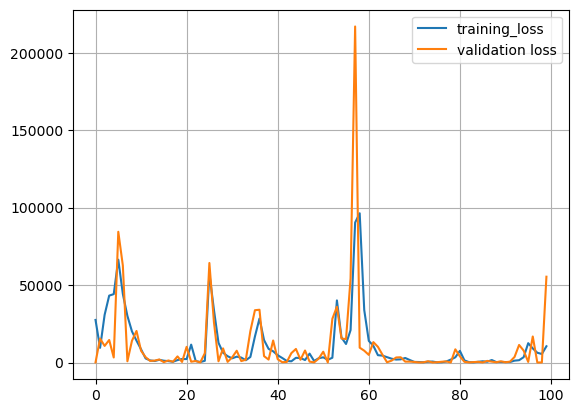

In [ ]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.grid(True)

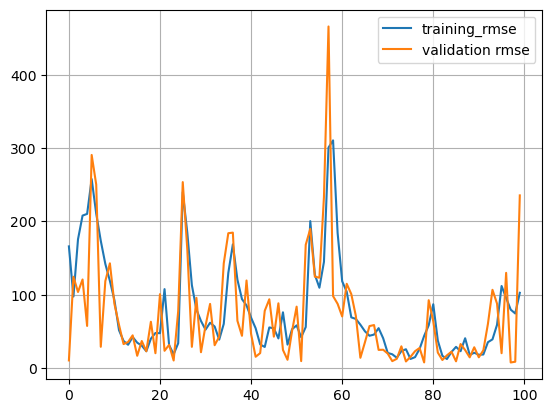

In [ ]:
plt.plot(history.history['root_mean_squared_error'], label = 'training_rmse')
plt.plot(history.history['val_root_mean_squared_error'], label = 'validation rmse')
plt.legend()
plt.grid(True)

In [ ]:
'''
The model seems to have overfit
As we can see from the graphs towards the end, it shoots up higher than the training loss indicating that its not
generalising well.
So, we should have trained for lesser epochs. From the graph, 70 - 78 seems like a range where the loss was stable,
so somewhere between them would stop the model from overfitting.
'''